<a href="https://colab.research.google.com/github/9mithun9/iris-flower-clustering-model/blob/main/iris_flower_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
iris_df = sns.load_dataset('iris')

In [9]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: xlabel='sepal_width', ylabel='petal_width'>

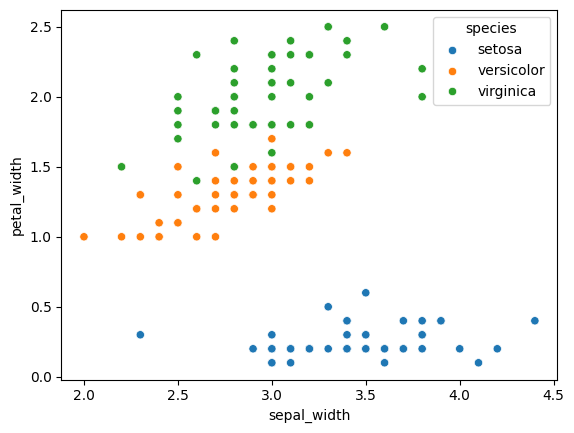

In [12]:
sns.scatterplot(data=iris_df, x='sepal_width', y='petal_width', hue='species')

In [13]:
iris_df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [14]:
numerical_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [15]:
x = iris_df[numerical_cols]

In [16]:
from sklearn.cluster import KMeans

In [18]:
model = KMeans(n_clusters=3, random_state=42)

In [19]:
model.fit(x)

KMeans(n_clusters=3, random_state=42)

In [20]:
model.cluster_centers_

array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

In [21]:
x_preds = model.predict(x)
x_preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

<Axes: xlabel='sepal_length', ylabel='petal_length'>

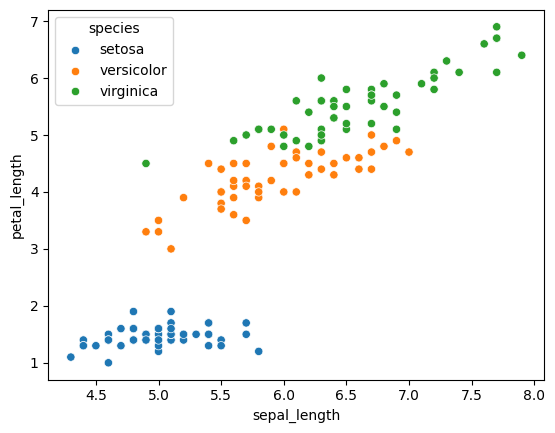

In [30]:
sns.scatterplot(data=iris_df, x='sepal_length', y='petal_length', hue='species')

In [32]:
model.cluster_centers_[:,2]

array([5.71538462, 1.462     , 4.38852459])

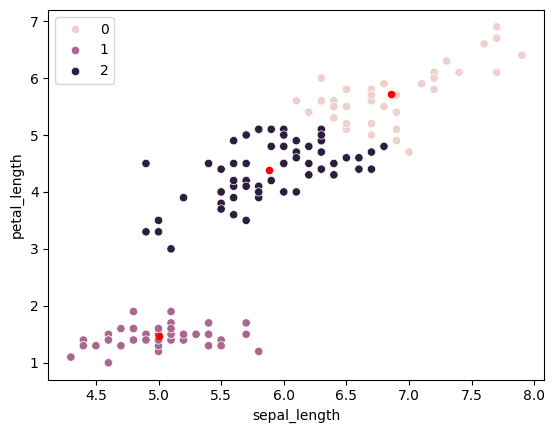

In [35]:
sns.scatterplot(data=x, x='sepal_length', y='petal_length', hue=x_preds)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,2], s = 20, c = 'red', label = 'Centroids')
plt.show()

In [36]:
model.inertia_

78.85566582597727

In [37]:
model = KMeans(n_clusters=6, random_state=42).fit(x)

In [38]:
preds = model.predict(x)

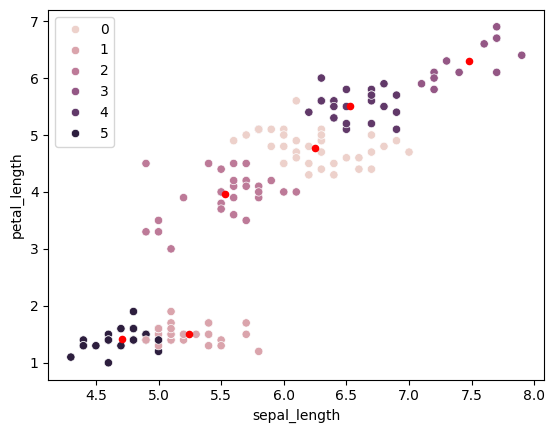

In [40]:
sns.scatterplot(data=x, x='sepal_length', y='petal_length', hue=preds)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[0:,2], s=20, c='red', label='centroid' )
plt.show()

In [42]:
model.inertia_

39.066035353535376

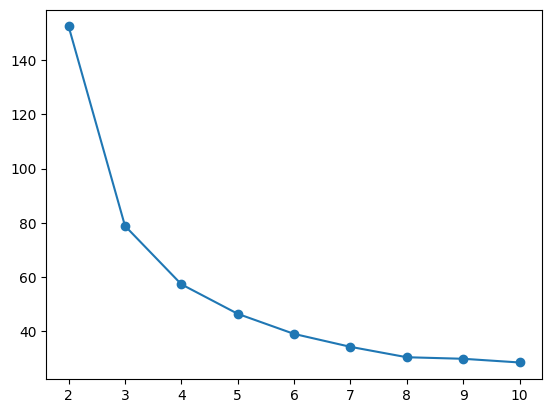

In [47]:
inertias=[]
for i in range(2,11):
  model = KMeans(n_clusters=i, random_state=42).fit(x)
  inertias.append(model.inertia_)

plt.plot(range(2,11), inertias, '-o')
plt.show()